<a href="https://colab.research.google.com/github/Yasna79/Challenge-Telecom-X_Alura_latam/blob/main/Telecom_Latam0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, han proporcionado algunos datos que deberàn ser explorados, tranformados y luego entregarlos al equipo de ciencia de datos, quienes realizaràn un análisis predictivo y determinaràn de dónde proviene esta evasión de clientes.**
##**El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.**


###**¿Qué practicar?**
##**✅ Importar y manipular datos desde una API de manera eficiente.**
##**✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.**
##**✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.**
##**✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes**

In [721]:
import requests
import pandas as pd
import json
import numpy as np

##**📌 Extracción(E - Extract)**

In [722]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [723]:
df = pd.read_json(Churn_de_Clientes)

In [724]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####**Viendo informacion del dato**

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


####**Aqui transformas columnas tipo diccionario en columnas normales**

In [726]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)


####**Mostrando el dato en forma aleatoria**

In [727]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3657,5039-LZRQT,No,Female,0,No,No,13,Yes,No,One year,...,Mailed check,20.20,273.25,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
725,1038-ZAGBI,Yes,Female,0,Yes,Yes,12,Yes,No,One year,...,Bank transfer (automatic),19.80,229.6,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2461,3428-XZMAZ,Yes,Male,0,No,No,1,Yes,No,Month-to-month,...,Electronic check,69.35,69.35,Fiber optic,No,No,No,No,No,No
4589,6288-CHQJB,No,Female,0,Yes,Yes,54,Yes,No,Two year,...,Bank transfer (automatic),69.95,3871.85,DSL,Yes,No,Yes,Yes,No,Yes
1004,1406-PUQVY,No,Male,0,No,Yes,1,Yes,No,Month-to-month,...,Electronic check,49.90,49.9,DSL,No,Yes,No,No,No,No
2059,2898-LSJGD,Yes,Female,0,Yes,Yes,21,No,No phone service,One year,...,Electronic check,55.95,1157.05,DSL,Yes,No,Yes,No,Yes,Yes
4662,6381-LOPCO,,Male,0,No,No,1,Yes,No,Month-to-month,...,Electronic check,69.80,69.8,Fiber optic,No,No,No,No,No,No
4692,6425-YQLLO,Yes,Female,1,Yes,No,66,Yes,Yes,One year,...,Credit card (automatic),105.95,6975.25,Fiber optic,No,No,Yes,Yes,Yes,Yes
912,1289-RKJJR,,Male,0,No,No,28,Yes,No,Month-to-month,...,Electronic check,91.00,2626.15,Fiber optic,No,No,Yes,Yes,No,Yes
4493,6164-HAQTX,No,Male,0,No,No,71,No,No phone service,Two year,...,Bank transfer (automatic),53.95,3888.65,DSL,Yes,Yes,Yes,Yes,Yes,No


In [728]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [730]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4808,6584-VQMYT,No,Male,0,No,Yes,27,Yes,No,One year,...,Mailed check,56.20,1567.55,DSL,Yes,Yes,No,No,No,No
5226,7130-YXBRO,No,Male,0,Yes,No,48,Yes,Yes,Month-to-month,...,Bank transfer (automatic),111.45,5315.1,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
4062,5564-NEMQO,Yes,Female,1,No,No,1,Yes,No,Month-to-month,...,Bank transfer (automatic),75.30,75.3,Fiber optic,No,No,Yes,No,No,No
5139,7016-NVRIC,No,Male,1,Yes,No,29,Yes,No,One year,...,Bank transfer (automatic),90.10,2656.7,Fiber optic,Yes,No,Yes,No,No,Yes
6754,9313-CDOGY,No,Male,0,Yes,Yes,38,Yes,No,Month-to-month,...,Electronic check,19.60,717.3,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,9065-ZCPQX,No,Male,0,Yes,No,72,Yes,Yes,Two year,...,Bank transfer (automatic),78.85,5763.15,DSL,Yes,Yes,Yes,Yes,No,Yes
6714,9244-ZVAPM,No,Male,0,No,No,1,Yes,No,Month-to-month,...,Mailed check,45.60,45.6,DSL,No,No,No,No,No,No
5536,7586-ZATGZ,No,Male,0,No,No,40,Yes,Yes,Month-to-month,...,Electronic check,84.90,3369.05,Fiber optic,No,No,No,No,Yes,No
3668,5055-MGMGF,No,Female,0,Yes,No,65,Yes,Yes,Month-to-month,...,Electronic check,105.05,6914.95,Fiber optic,Yes,No,Yes,No,Yes,Yes


###**Preguntando si hay datos nulos**

In [731]:
df.isna().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


####**Chequear si hay duplicados**

In [732]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


####**Cambiamos el tipo de variable, el nombre y borramos la antigua**

In [733]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)


In [734]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Renombrando Columnas**


In [735]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)



In [736]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Creando una nueva Columna y dividiendo cada valor entre 30**

In [737]:
df['DailyCharges'] = df['ChargesMonthly'] / 30



In [738]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
37,0058-EVZWM,No,Female,0,Yes,No,55,Yes,Yes,Month-to-month,...,Fiber optic,Yes,No,No,No,Yes,No,4959.60,89.80,2.993333
234,0354-WYROK,Yes,Female,1,Yes,Yes,31,Yes,No,Month-to-month,...,Fiber optic,No,No,Yes,Yes,Yes,Yes,2911.30,98.90,3.296667
3397,4707-YNOQA,No,Female,0,Yes,Yes,34,Yes,Yes,One year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,917.15,25.60,0.853333
1757,2498-XLDZR,No,Female,0,Yes,Yes,32,Yes,No,Two year,...,DSL,Yes,Yes,Yes,Yes,No,Yes,2316.85,73.60,2.453333
5056,6907-CQGPN,No,Male,0,No,No,29,No,No phone service,Month-to-month,...,DSL,No,Yes,No,Yes,No,No,1004.75,34.30,1.143333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,8148-BPLZQ,No,Male,0,No,No,34,Yes,No,Month-to-month,...,DSL,No,Yes,No,No,No,No,1734.20,49.80,1.660000
6511,8947-YRTDV,No,Male,0,Yes,Yes,32,Yes,No,One year,...,Fiber optic,Yes,Yes,Yes,No,No,Yes,3131.55,94.80,3.160000
2742,3795-GWTRD,No,Female,0,Yes,Yes,63,Yes,No,Two year,...,DSL,Yes,Yes,Yes,Yes,Yes,No,4707.85,75.55,2.518333
6239,8587-XYZSF,No,Male,0,No,No,67,Yes,No,Two year,...,DSL,No,No,No,Yes,No,No,3260.10,50.55,1.685000


####**Columnas que deben ser transformadas: sólo las estrictamente "Yes"/"No"**


In [739]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


####**Reemplazar "No phone service" por "No" en la columna MultipleLines**


In [740]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()



,count
MultipleLines,
No,4202
Yes,3065


####**Transformar "Yes"/"No" a 1/0 en MultipleLines**


In [741]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [742]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


####**Reemplazar valores en la columna 'Contract'**


In [743]:
df['Contract'] = df['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'})

df['Contract'] = df['Contract'].astype('int64')

df['Contract'].value_counts()


,count
Contract,
1,4005
3,1743
2,1519


In [744]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


####**Columnas que se transformarán: "Sí" → 1, todo lo demás → 0**


In [745]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


###**Recorre cada valor de la columna Churn del DataFrame df.**

####**Si el valor es 'Yes' o 'No', lo deja igual.**

####**Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'.**


---



In [746]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [747]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
N/A,224


In [748]:
df.to_json('Churn_de_Clientes.json', index= False)

##**📊 Carga y análisis(L - Load & Analysis)**

In [749]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1


,Total
Churn,
N/A,224
No,5174
Yes,1869


In [750]:
import matplotlib.pyplot as plt
import seaborn as sns


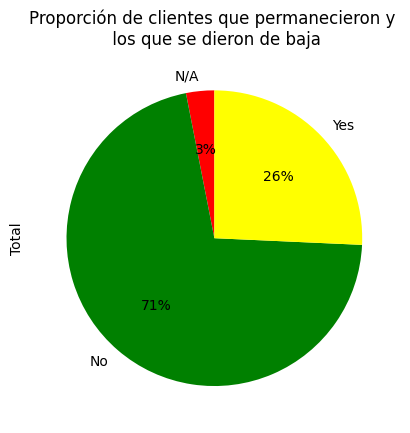

<Figure size 640x480 with 0 Axes>

In [756]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'green','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')